In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split   
import matplotlib.pyplot as plt
import numpy as np

# Importing Linear Regression
from sklearn.linear_model import LinearRegression
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for training data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [9]:
uni_df= pd.read_csv("unifed_csv.csv")

In [10]:
uni_df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3274 entries, 0 to 3273
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 3274 non-null   object 
 1   status                                       3274 non-null   object 
 2   num_funding_rounds                           3274 non-null   float64
 3   total_funding_usd                            3274 non-null   float64
 4   founded_on                                   3274 non-null   float64
 5   employee_count                               3274 non-null   object 
 6   cat_pca_0                                    3274 non-null   float64
 7   cat_pca_1                                    3274 non-null   float64
 8   cat_pca_2                                    3274 non-null   float64
 9   cat_pca_3                                    3274 non-null   float64
 10  

In [13]:
features= uni_df[["total_funding_usd","first_fund_raised","average_momentum"  ]]
# features= uni_df[["total_funding_usd", "funds_raised_amount_usd", "first_fund_raised","average_momentum"  ]]

features["total_funding_usd"]= features["total_funding_usd"].fillna(0)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3274 entries, 0 to 3273
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_funding_usd  3274 non-null   float64
 1   first_fund_raised  3274 non-null   float64
 2   average_momentum   3274 non-null   float64
dtypes: float64(3)
memory usage: 76.9 KB


Total funding usd

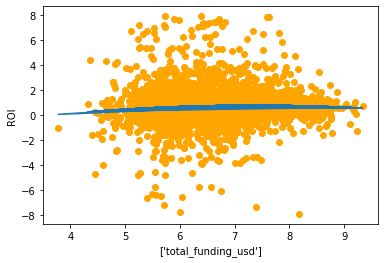

In [16]:
##### log the result ###### 

# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["total_funding_usd"]]
x=x[x["total_funding_usd"]!=0]
x=np.log10(x)
y = features[["total_funding_usd", "average_momentum"]]
y=y[y["total_funding_usd"]!=0]
y=y.drop(columns=["total_funding_usd"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("ROI")
#plt.xlim([0,5000000000])
plt.plot(x, y_pred)

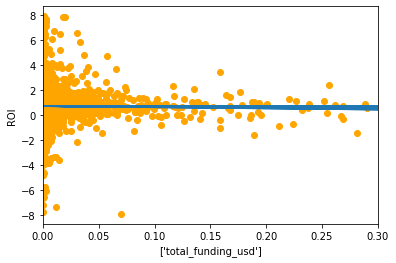

In [15]:
###### Normalize the result #######

# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["total_funding_usd"]]
x=x[x["total_funding_usd"]!=0]
x_max=x.max()
x_min=x.min()
x= (x-x_min)/(x_max-x_min)
y = features[["total_funding_usd", "average_momentum"]]
y=y[y["total_funding_usd"]!=0]
y=y.drop(columns=["total_funding_usd"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("ROI")
plt.xlim([0,0.3])
plt.plot(x, y_pred)

In [33]:
###### (LOG) Split with train test split to obtain rmse #######

# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["total_funding_usd"]]
x=x[x["total_funding_usd"]!=0]
x=np.log10(x)
y = features[["total_funding_usd", "average_momentum"]]
y=y[y["total_funding_usd"]!=0]
y=y.drop(columns=["total_funding_usd"])

mse_arr=[]
r2_arr=[]

for i in range(8):
    #Change degree of x to fit into the model
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 5)

    deg=i+2
    pre_process= PolynomialFeatures(degree=deg)

    x_poly_train= pre_process.fit_transform(X_train)
    x_poly_test= pre_process.fit_transform(X_test)

    # Training the model
    pr_model= LinearRegression()

    # Fit our preprocessed data to the polynomial regression model
    pr_model.fit(x_poly_train, y_train)
    # Store our predicted ROI values in the variable y_pred
    y_pred = pr_model.predict(x_poly_test)

    #print result
    mse_arr.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_arr.append(r2_score(y_test,y_pred))


print("mse is: ", mse_arr)
print()
print("r2 score is ", r2_arr)

mse is:  [1.4553690108310595, 1.4556768617218045, 1.4602404708862127, 1.4608278772993213, 1.4633221257603508, 1.4637235849959596, 1.468872730688318, 1.4752460552042401]

r2 score is  [-0.004652758977279126, -0.005077827747369756, -0.011389630024155828, -0.012203490835996256, -0.015662957061364446, -0.016220323343862253, -0.023382700716873872, -0.03228272303173796]


In [29]:
###### (NORMALIZE) Split with train test split to obtain rmse #######

# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["total_funding_usd"]]
x=x[x["total_funding_usd"]!=0]
x_max=x.max()
x_min=x.min()
x= (x-x_min)/(x_max-x_min)
y = features[["total_funding_usd", "average_momentum"]]
y=y[y["total_funding_usd"]!=0]
y=y.drop(columns=["total_funding_usd"])

mse_arr=[]
r2_arr=[]

for i in range(8):
    #Change degree of x to fit into the model
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 5)

    deg=i+2
    pre_process= PolynomialFeatures(degree=deg)

    x_poly_train= pre_process.fit_transform(X_train)
    x_poly_test= pre_process.fit_transform(X_test)

    # Training the model
    pr_model= LinearRegression()

    # Fit our preprocessed data to the polynomial regression model
    pr_model.fit(x_poly_train, y_train)
    # Store our predicted ROI values in the variable y_pred
    y_pred = pr_model.predict(x_poly_test)

    #print result
    mse_arr.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_arr.append(r2_score(y_test,y_pred))


print(mse_arr)
print(r2_arr)

[1.4547508942501, 1.4549294790578802, 1.4590705666195631, 1.468636968365307, 1.4631595769076655, 1.461068940222226, 1.4615961934114012, 1.5076308585326244]
[-0.003799558652840318, -0.004046026079118414, -0.009769684430530168, -0.023054209738987197, -0.015437325703866023, -0.012537582029703787, -0.013268498938239004, -0.07810179953005125]


funds_raised_amount_usd

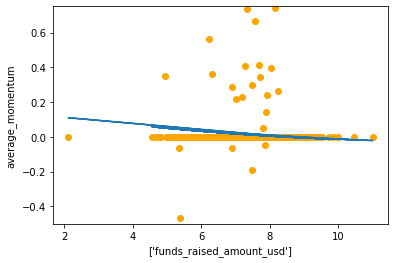

In [10]:
#### Log ####
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["funds_raised_amount_usd"]]
x=x[x["funds_raised_amount_usd"]!=0]
x=np.log10(x)
y = features[["funds_raised_amount_usd", "average_momentum"]]
y=y[y["funds_raised_amount_usd"]!=0]
y=y.drop(columns=["funds_raised_amount_usd"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("average_momentum")
#plt.xlim([0,10000000000])
plt.ylim([-0.5,0.75])
plt.plot(x, y_pred)

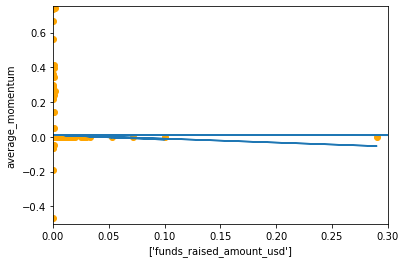

In [11]:
#### Normalize ####
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["funds_raised_amount_usd"]]
x=x[x["funds_raised_amount_usd"]!=0]
x_max=x.max()
x_min=x.min()
x= (x-x_min)/(x_max-x_min)
y = features[["funds_raised_amount_usd", "average_momentum"]]
y=y[y["funds_raised_amount_usd"]!=0]
y=y.drop(columns=["funds_raised_amount_usd"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("average_momentum")
plt.xlim([0,0.3])
plt.ylim([-0.5,0.75])
plt.plot(x, y_pred)

acquisitions_price_usd

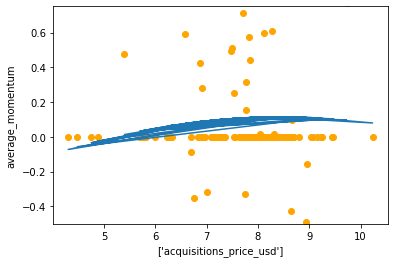

In [12]:
#### Log ####
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["acquisitions_price_usd"]]
x=x[x["acquisitions_price_usd"]!=0]
x=np.log10(x)

y = features[["acquisitions_price_usd", "average_momentum"]]
y=y[y["acquisitions_price_usd"]!=0]
y=y.drop(columns=["acquisitions_price_usd"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("average_momentum")
#plt.xlim([0,3000000000])
plt.ylim([-0.5,0.75])
plt.plot(x, y_pred)

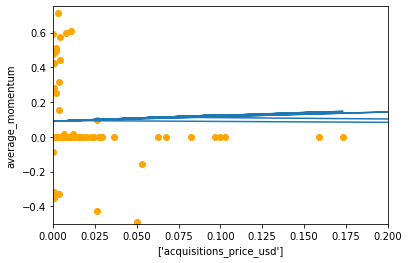

In [13]:
#### Normalize ####
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["acquisitions_price_usd"]]
x=x[x["acquisitions_price_usd"]!=0]
x_max=x.max()
x_min=x.min()
x= (x-x_min)/(x_max-x_min)
y = features[["acquisitions_price_usd", "average_momentum"]]
y=y[y["acquisitions_price_usd"]!=0]
y=y.drop(columns=["acquisitions_price_usd"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("average_momentum")
plt.xlim([0,0.2])
plt.ylim([-0.5,0.75])
plt.plot(x, y_pred)

first_fund_raised

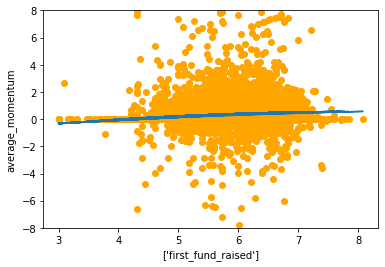

In [14]:
#### Log #####
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["first_fund_raised"]]
x=x[x["first_fund_raised"]!=0]
x=np.log10(x)
y = features[["first_fund_raised", "average_momentum"]]
y=y[y["first_fund_raised"]!=0]
y=y.drop(columns=["first_fund_raised"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("average_momentum")
#plt.xlim([0,70000000])
plt.ylim([-8,8])
plt.plot(x, y_pred)

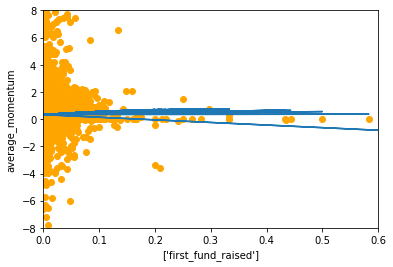

In [15]:
#### Normalize #####
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["first_fund_raised"]]
x=x[x["first_fund_raised"]!=0]
x_max=x.max()
x_min=x.min()
x= (x-x_min)/(x_max-x_min)
y = features[["first_fund_raised", "average_momentum"]]
y=y[y["first_fund_raised"]!=0]
y=y.drop(columns=["first_fund_raised"])

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c="orange")
plt.xlabel(x.columns.values)
plt.ylabel("average_momentum")
plt.xlim([0,0.6])
plt.ylim([-8,8])
plt.plot(x, y_pred)

In [32]:
###### (LOG) Split with train test split to obtain rmse #######

# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["first_fund_raised"]]
x=x[x["first_fund_raised"]!=0]
x=np.log10(x)
y = features[["first_fund_raised", "average_momentum"]]
y=y[y["first_fund_raised"]!=0]
y=y.drop(columns=["first_fund_raised"])

mse_arr=[]
r2_arr=[]

for i in range(8):
    #Change degree of x to fit into the model
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 5)

    deg=i+2
    pre_process= PolynomialFeatures(degree=deg)

    x_poly_train= pre_process.fit_transform(X_train)
    x_poly_test= pre_process.fit_transform(X_test)

    # Training the model
    pr_model= LinearRegression()

    # Fit our preprocessed data to the polynomial regression model
    pr_model.fit(x_poly_train, y_train)
    # Store our predicted ROI values in the variable y_pred
    y_pred = pr_model.predict(x_poly_test)

    #print result
    mse_arr.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_arr.append(r2_score(y_test,y_pred))


print(mse_arr)
print(r2_arr)

[1.4342578029080995, 1.438938192244049, 1.442910344032307, 1.5625204703247262, 1.8669672975422869, 2.0648406622947904, 4.584781622597567, 10.759181770923085]
[-0.00040501280482763136, -0.006944875798598593, -0.01251183968535896, -0.18733384616717652, -0.6950981041967197, -1.0734544767118797, -9.22253781915272, -55.296306974491905]
